# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [2]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

In [3]:
import scipy.stats as sps

In [70]:
import warnings

warnings.filterwarnings("ignore")

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

 Вначале нужно создать функцию, которая бы давала равномерное распределение.

In [92]:
def uniform(size=1, precision=30):
    sz = np.concatenate((np.array([size]).flatten(), [precision]))
    return np.sum(
        sps.bernoulli(0.5).rvs(sz) * (0.5 ** np.arange(1, precision + 1)),
        axis=-1,
    )


def normal(size=1, precision=30, loc=0, scale=1):
    cos = np.cos(2 * np.pi * uniform(size, precision))
    sq = np.sqrt(-2 * np.log(uniform(size, precision)))
    return loc + scale * cos * sq


def expon(size=1, precision=30, lambd=1):
    return -np.log(np.ones(size) - uniform(size, precision)) / lambd

In [79]:
def show_one(sample, pdf, xmin, xmax, text):
    """
    Функция выводит график плотность распределения, а также гистограммы выборки
    :param sample: выборка
    :param pdf: плотность слу величины
    :param xmin: левая граница
    :param xmax: правая граница
    :param text: название графика
    """
    grid = np.linspace(xmin, xmax, 1000)  # сетка для построения графика

    # Визуализация
    plt.figure(figsize=(10, 5))
    plt.hist(
        sample, bins=30, density=True, alpha=0.6, label="Гистограмма выборки"
    )
    plt.plot(
        grid, pdf(grid), color="red", lw=5, label="Плотность случайной величины"
    )
    plt.title(text, fontsize=20)
    plt.legend(fontsize=14, loc=1)
    plt.show()

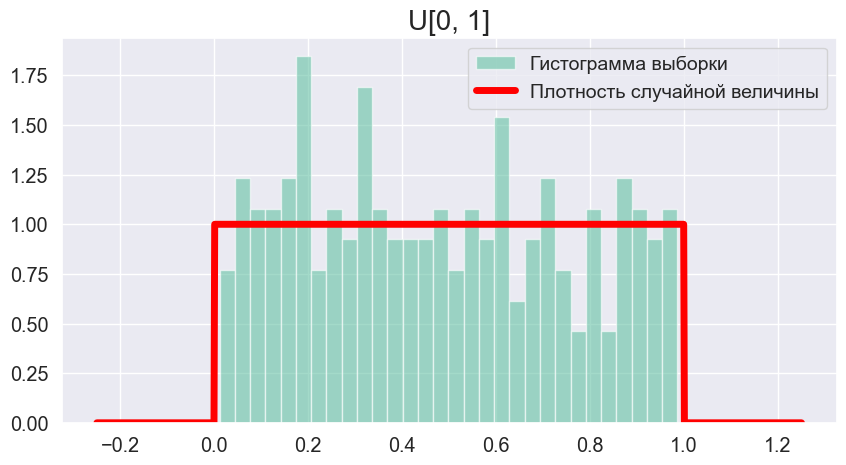

In [80]:
show_one(uniform(200), sps.uniform.pdf, xmin=-0.25, xmax=1.25, text="U[0, 1]")

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

In [103]:
def show_many(samples, pdf, xmin, xmax, texts):
    """
    Функция выводит несколько графиков
    :param samples: выборки
    :param pdf: плотность слу величины
    :param xmin: левая граница
    :param xmax: правая граница
    :param text: название графика
    """
    grid = np.linspace(xmin, xmax, 1000)  # сетка для построения графика

    rows = 2
    cols = 2
    for i in range(4):
        plt.subplot(rows, cols, i + 1)
        plt.hist(samples[i], bins=30, density=True, alpha=0.6)
        plt.plot(
            grid,
            pdf(grid),
            color="red",
            lw=1,
        )
        plt.title(texts[i], fontsize=20)
        plt.legend(fontsize=14, loc=1)
        plt.xticks([])
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


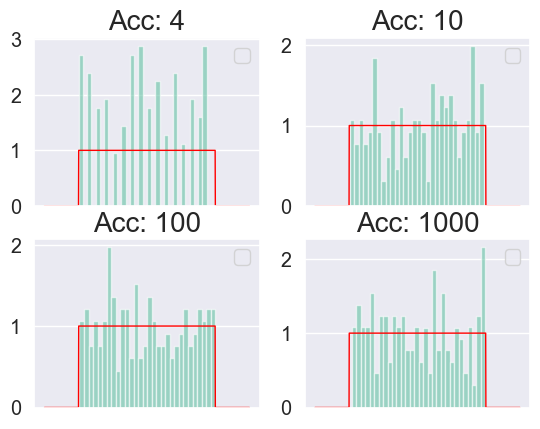

In [104]:
samples = [
    uniform(200, 4),
    uniform(200, 10),
    uniform(200, 100),
    uniform(200, 1000),
]
texts = ["Acc: 4", "Acc: 10", "Acc: 100", "Acc: 1000"]
show_many(samples, sps.uniform.pdf, xmin=-0.25, xmax=1.25, texts=texts)

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

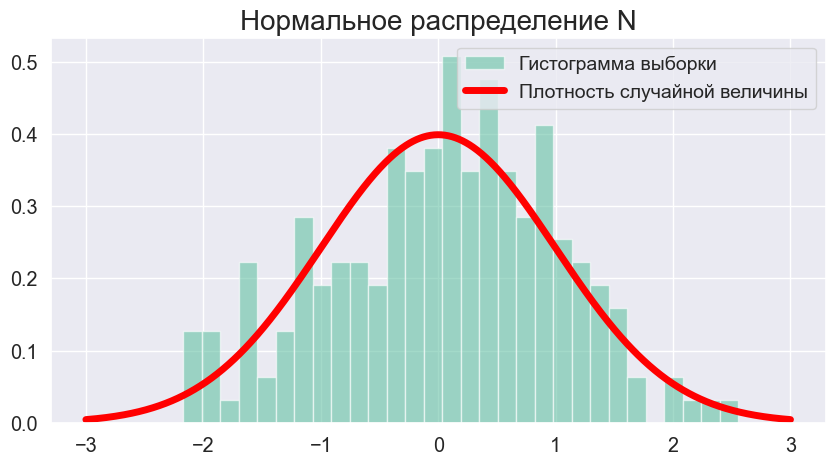

In [105]:
show_one(
    normal(200),
    sps.norm.pdf,
    xmin=-3,
    xmax=3,
    text="Нормальное распределение N",
)

Также посмотрим на зависимость распределения от точности.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


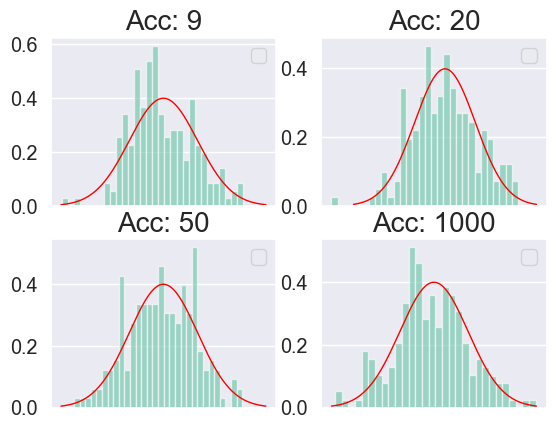

In [106]:
samples = [normal(200, 9), normal(200, 20), normal(200, 50), normal(200, 1000)]

texts = ["Acc: 9", "Acc: 20", "Acc: 50", "Acc: 1000"]
show_many(samples, sps.norm.pdf, xmin=-3, xmax=3, texts=texts)

ValueError: supplied range of [-inf, 2.802236143242943] is not finite

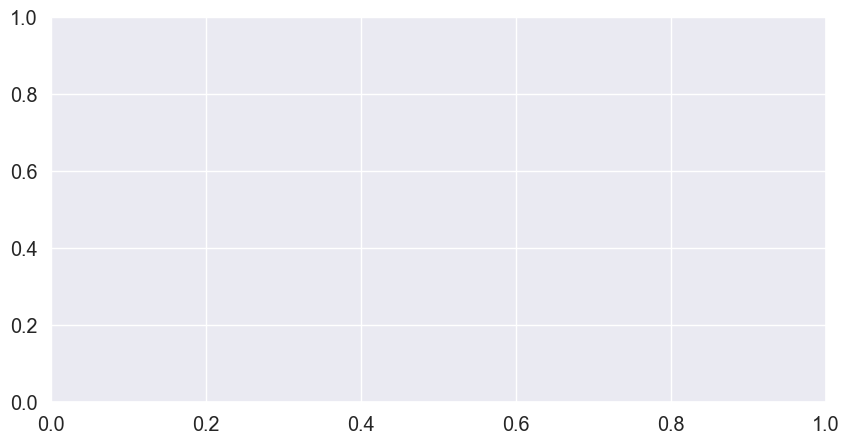

In [110]:
show_one(normal(200, 8), sps.norm.pdf, xmin=-3, xmax=3, text="Низкая точность")

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

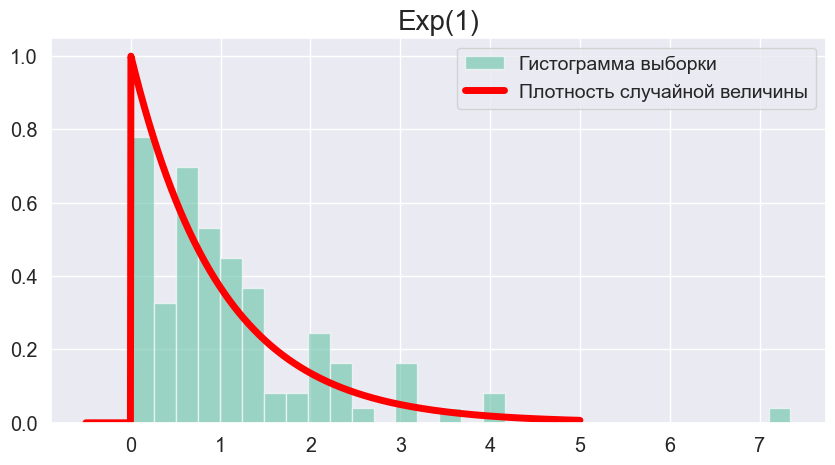

In [111]:
show_one(expon(100), sps.expon.pdf, xmin=-0.5, xmax=5, text="Exp(1)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


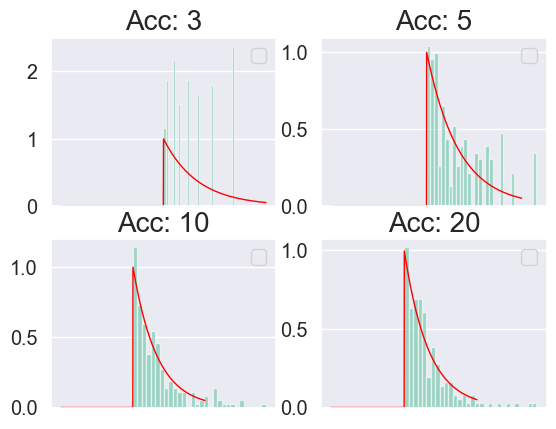

In [119]:
samples = [expon(200, 3), expon(200, 5), expon(200, 10), expon(200, 20)]

texts = ["Acc: 3", "Acc: 5", "Acc: 10", "Acc: 20"]
show_many(samples, sps.expon.pdf, xmin=-3, xmax=3, texts=texts)

**Выводы:**

В этом задании мы рассмотрели распределения и выборки, которые им соответствуют, а также зависимость распределения от точности чисел выборки (количество числе после запятой).
1) Для равномерного распределения, при малой точности числа цонцетрируются в несколькиз областях и в некоторые, числа не могут попасть, поэтому она скорее становится дискретной. При достаточно больших значениях разницы нет.
2) Для нормального распределения разницы не видно, но при precision < 9 происходит ошибка, так как числа начинают слишком сильно концентрироваться в одном месте, что приводит к переполнению числа и ошибки при визуализации.
3) Для экспоненциального распределения работает та же логика, что и для равномерного: при малом числе знаков после запятой случайная величина становится дискртеной, или эе все числа начинают концетрироваться в слишком малом числе точек. Но в оличие от равномерного распределения, рост точности влияет на гладкость распределения, чем выше точность, тем ближе к графику плотности.

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

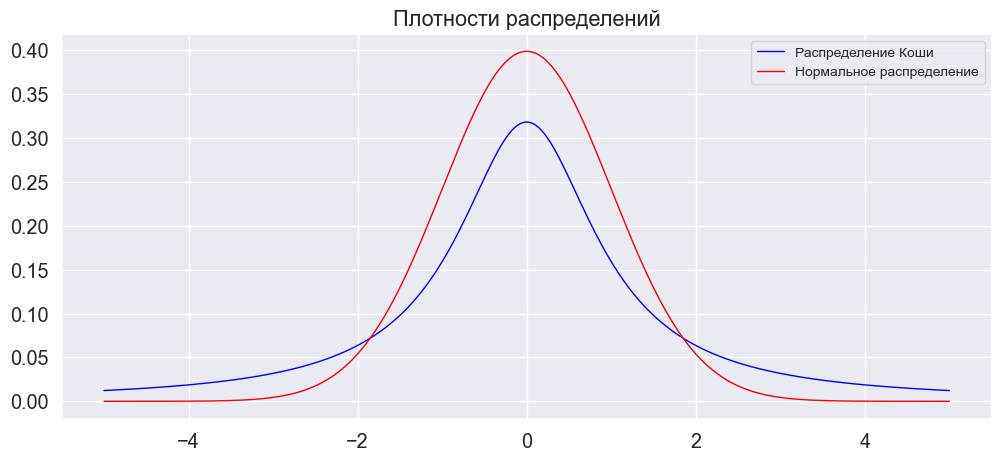

In [128]:
grid = np.linspace(-5, 5, 5000)  # сетка для построения графика

# Описание графика
plt.figure(figsize=(12, 5))
plt.plot(
    grid, sps.cauchy.pdf(grid), color="blue", lw=1, label="Распределение Коши"
)
plt.plot(
    grid,
    sps.norm.pdf(grid),
    color="red",
    lw=1,
    label="Нормальное распределение",
)
plt.title("Плотности распределений")
plt.legend(fontsize=10, loc=1)

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Вначале выведем просто удиничные выборки

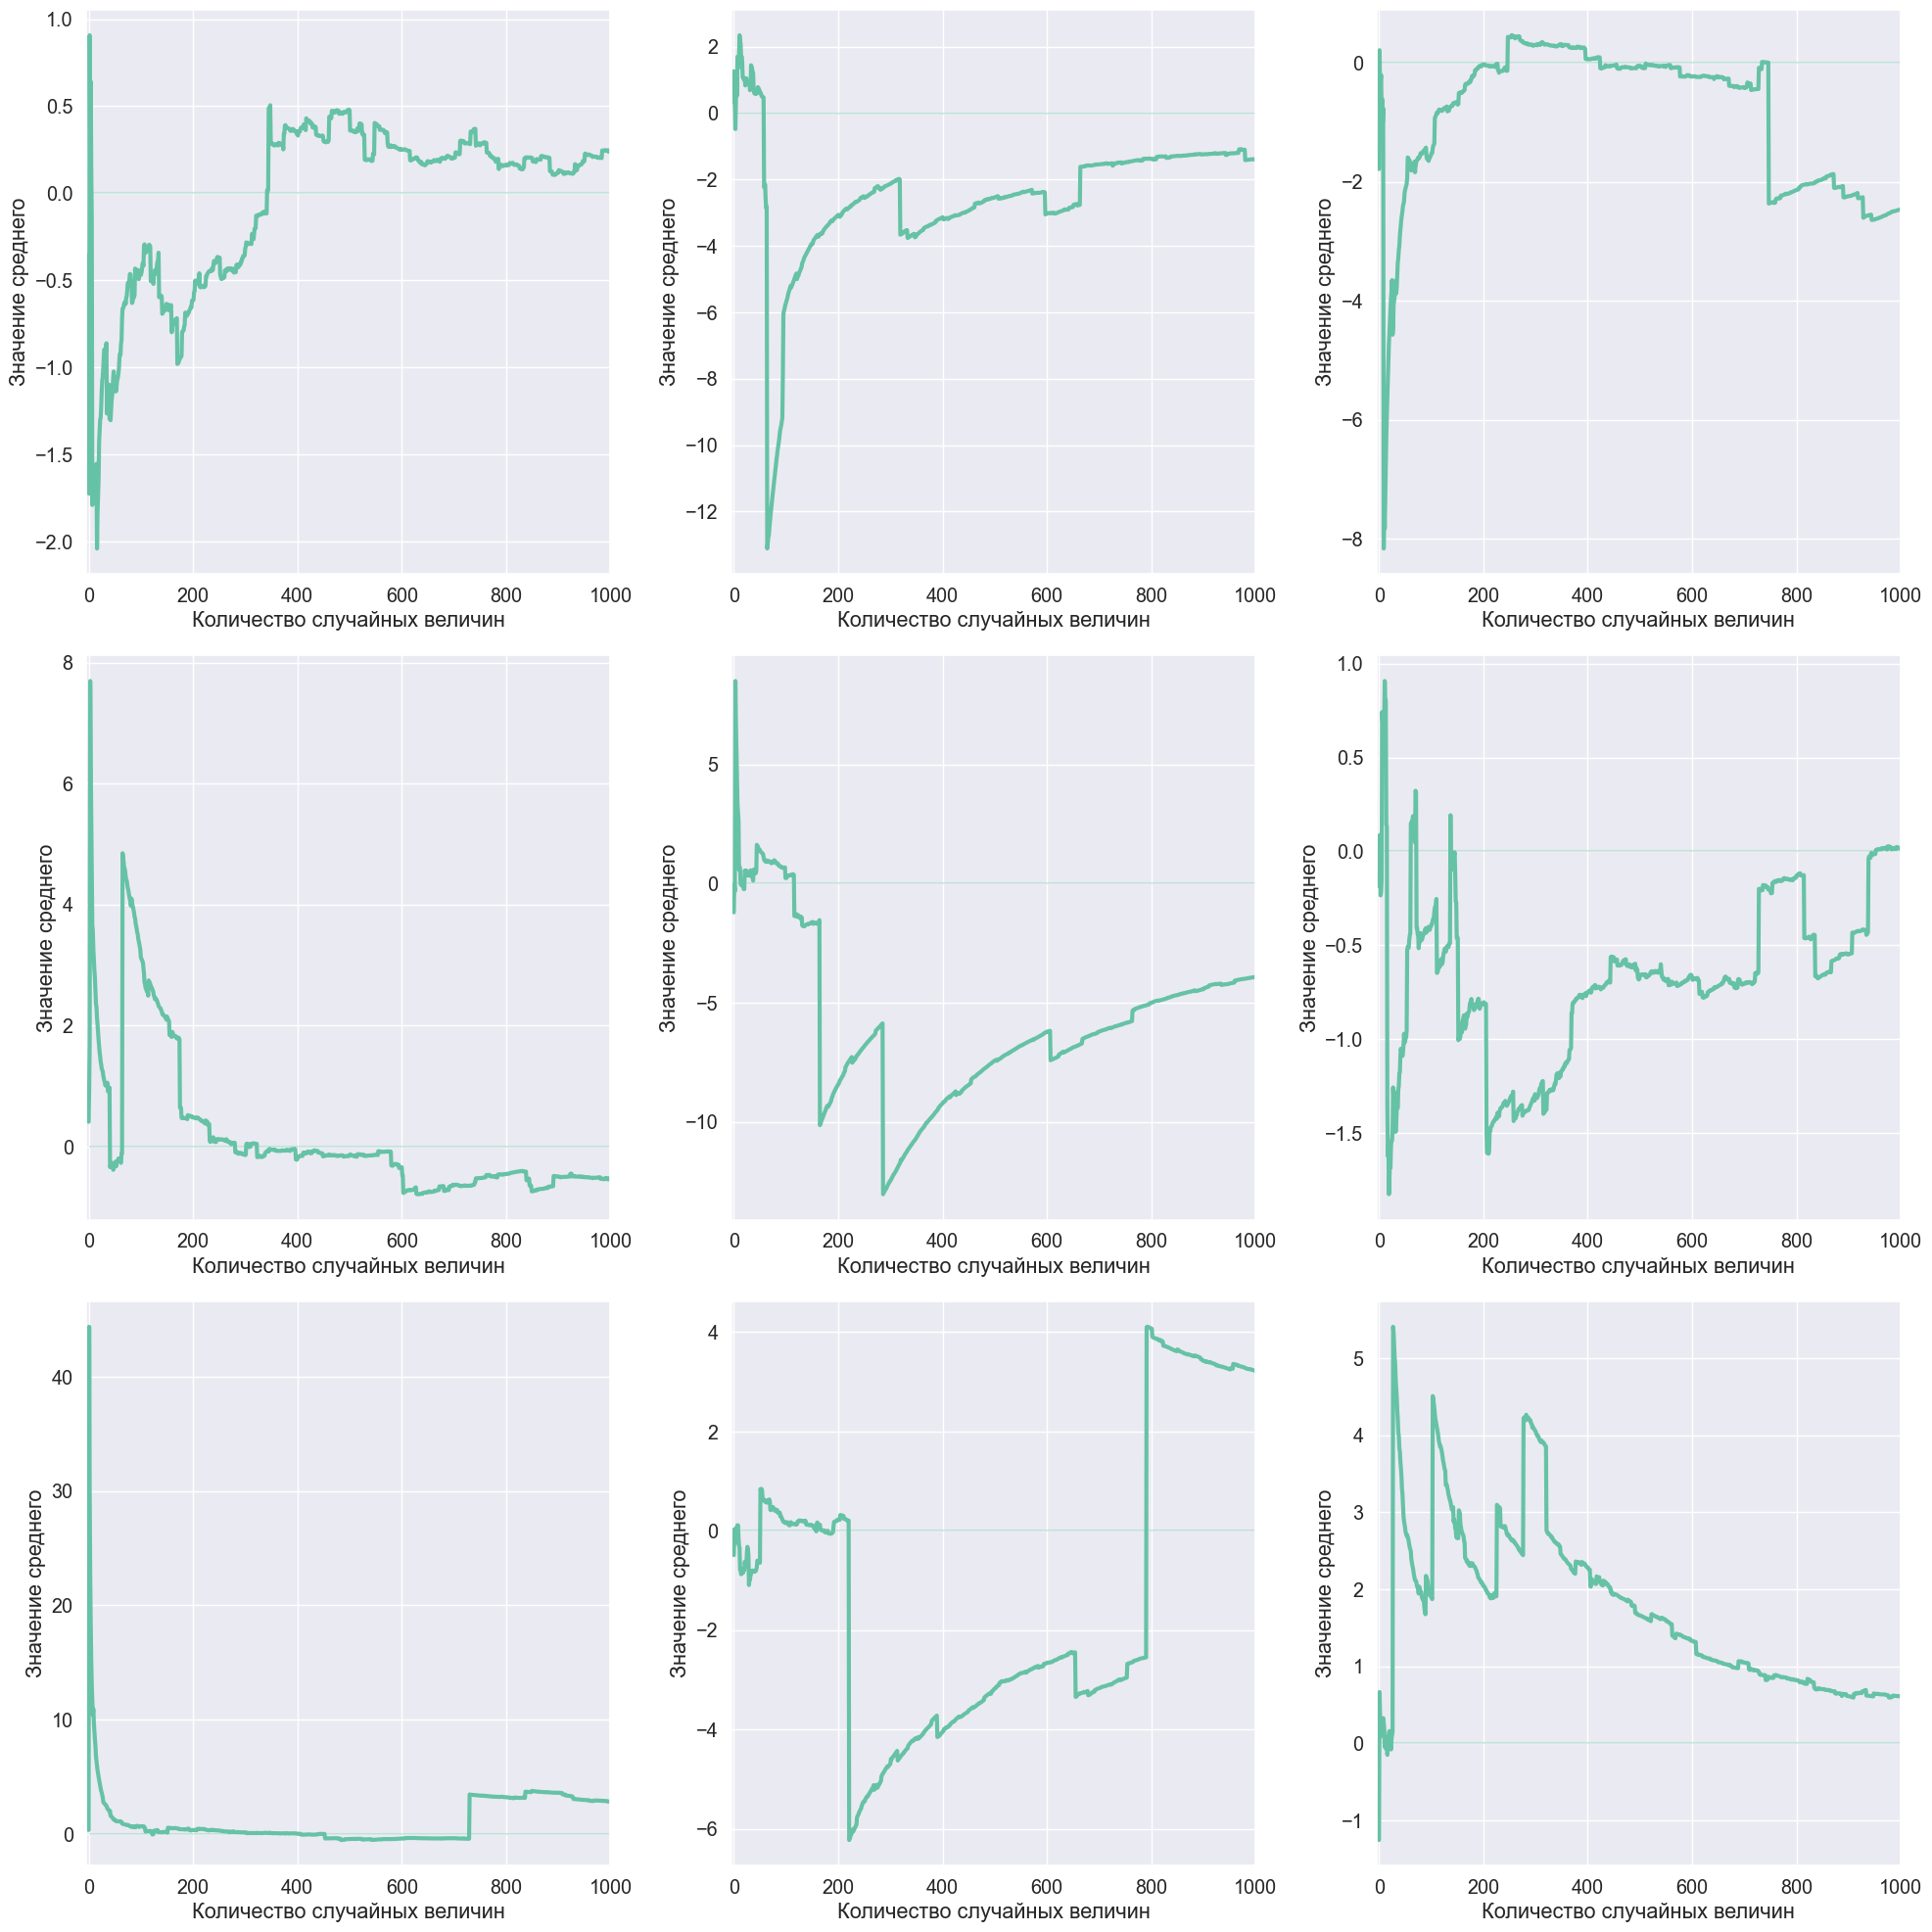

In [136]:
size = 1000  # Количество элементов
plt.figure(figsize=(20, 20))  # Размер полотна
rows = 3
cols = 3

# эксперименты
for i in range(rows * cols):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_means = samples.cumsum() / (np.arange(size) + 1)

    # График
    plt.subplot(rows, cols, i + 1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0, 0, size, alpha=0.3)
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.xlim((-5, size))

plt.tight_layout()

Теперь изобразим множество графиков на одном пространстве.

In [188]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

In [163]:
def show_cumsum_cauchy(means, smps_cnt, ymin, ymax):
    """
    Функция для визуализации зависимости среднего от количества случайных величин
    :param means: средние значения
    :param smps_cnt: количество средних для каждой случайной величины
    :param ymin: минимальная граница вывод графика по y
    :param ymax: максимальная граница вывода графика по y
    """
    plt.figure(figsize=(15, 7))

    # рисуем для каждой выборки отдельно
    for i in range(smps_cnt):
        plt.plot(np.arange(size) + 1, means[i], color="green", alpha=0.05)

    plt.title(
        "Распределения Коши: зависимость среднего от количества случайных величин"
    )
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.xlim((0, size))
    plt.ylim((ymin, ymax));

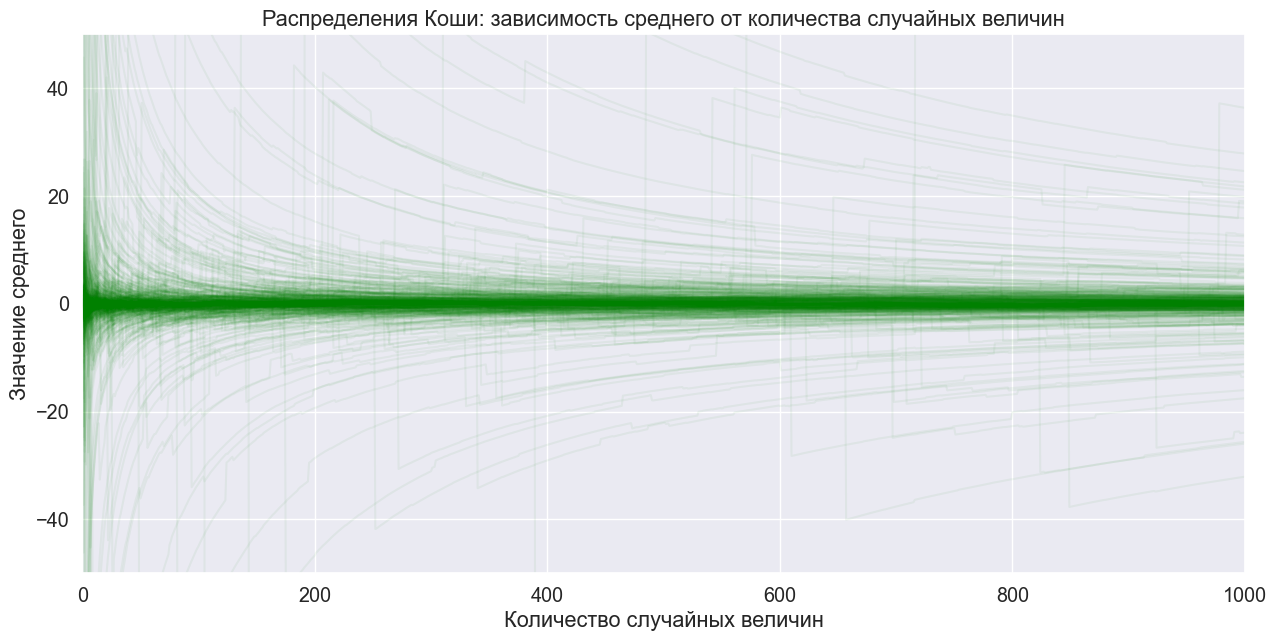

In [191]:
show_cumsum_cauchy(cum_means, samples_count, -50, 50)

Так как у распредления Коши слишком большие хвосты, то нужно среднее может довольно сильно уходить он y=0, поэтому увеличим границы по y: (-50, 50) -> (-250, 250)

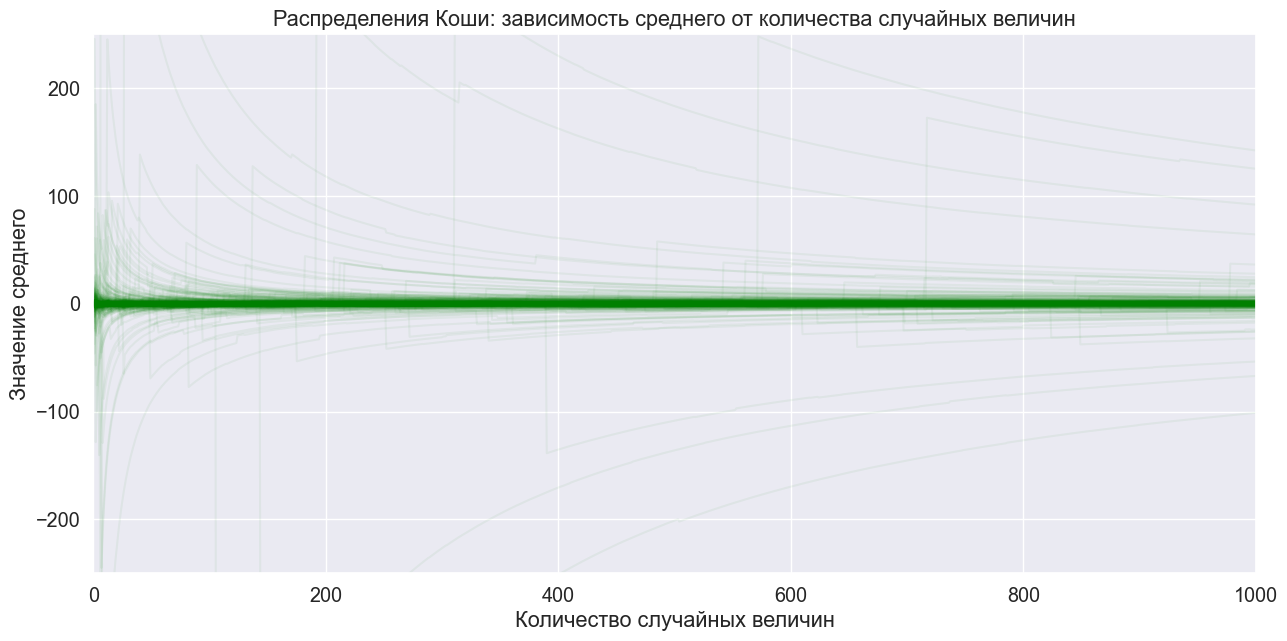

In [192]:
show_cumsum_cauchy(cum_means, samples_count, -250, 250)

Еще увеличим границы по y: (-250, 250) -> (-1000, 1000)

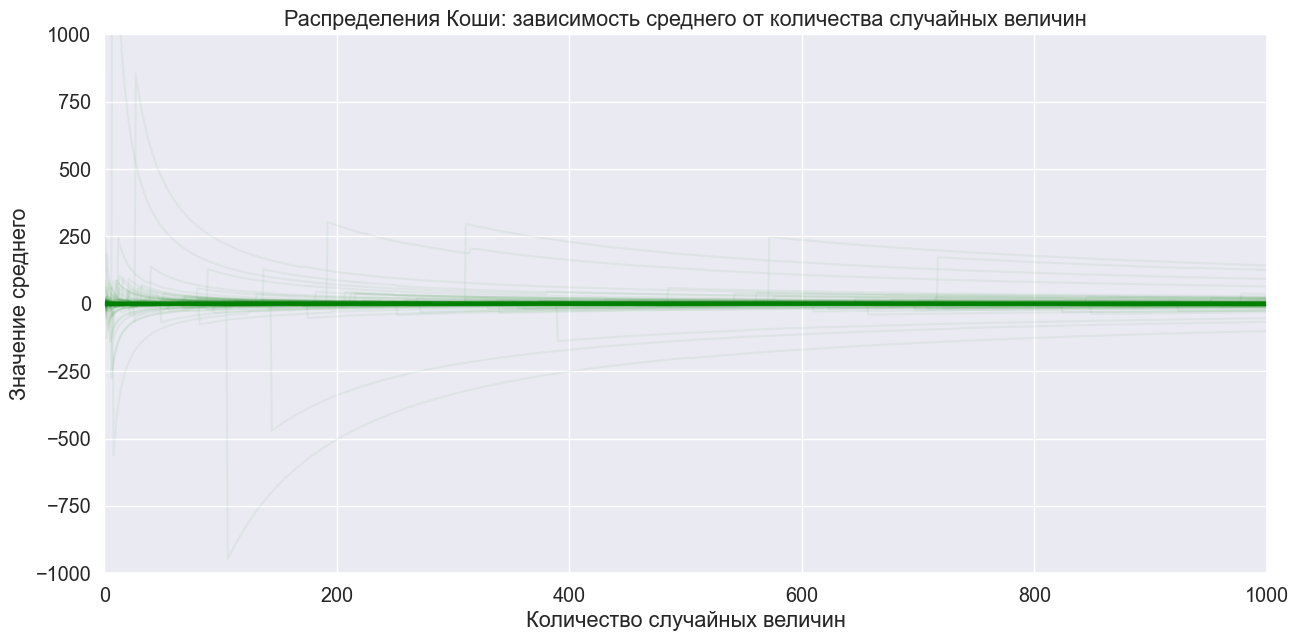

In [190]:
show_cumsum_cauchy(cum_means, samples_count, -1000, 1000)

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

Также, как и в прошлом пункте, вначале выведем несколько одиночных графиков.

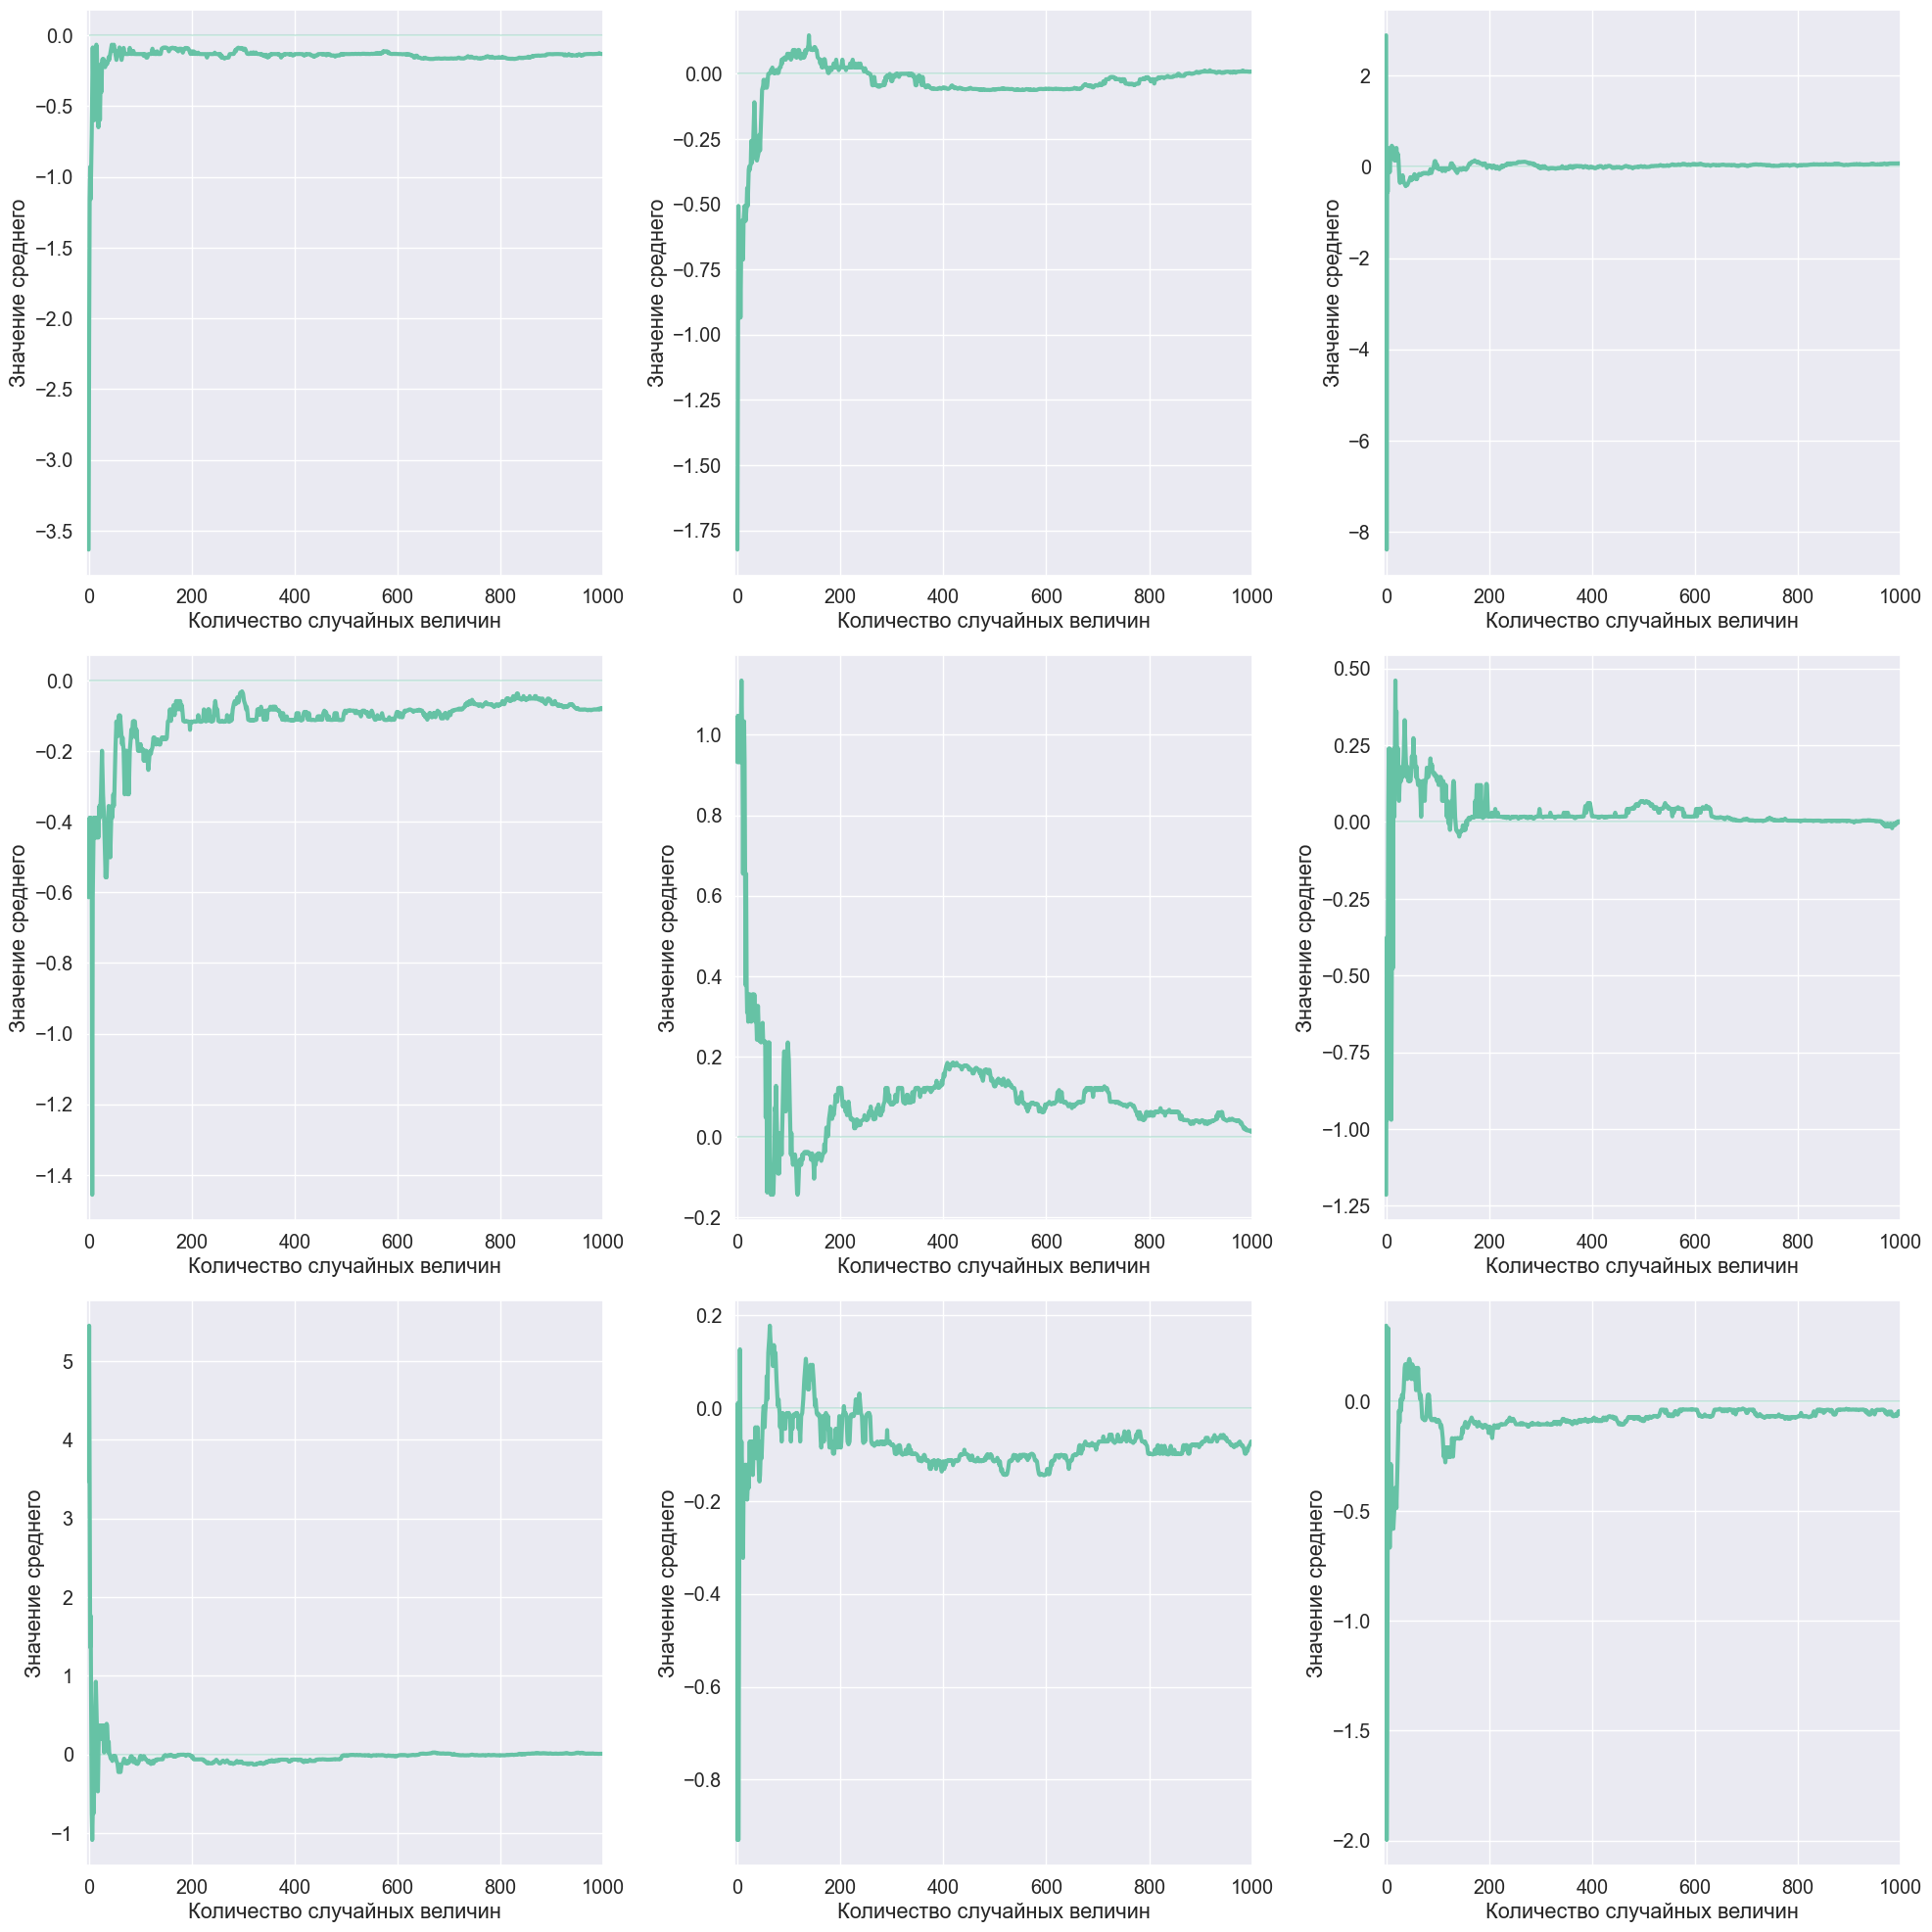

In [178]:
size = 1000  # Количество элементов
plt.figure(figsize=(20, 20))  # Размер полотна
rows = 3
cols = 3

# эксперименты
for i in range(rows * cols):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_means = np.array([np.median(samples[: i + 1]) for i in range(size)])

    # График
    plt.subplot(rows, cols, i + 1)
    plt.plot(cum_means, lw=3)
    plt.hlines(0, 0, size, alpha=0.3)
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.xlim((-5, size))

plt.tight_layout()

In [179]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_med = []
for smp in range(samples_count):
    cum_med.append([np.median(samples[smp][: i + 1]) for i in range(size)])
cum_med = np.array(cum_med)

In [183]:
def show_cummed_cauchy(med, smps_cnt, ymin, ymax):
    """
    Функция для визуализации зависимости медианы от количества случайных величин
    :param means: медианы
    :param smps_cnt: количество медиан для каждой случайной величины
    :param ymin: минимальная граница вывод графика по y
    :param ymax: максимальная граница вывода графика по y
    """
    plt.figure(figsize=(15, 7))

    # рисуем для каждой выборки отдельно
    for i in range(smps_cnt):
        plt.plot(np.arange(size) + 1, med[i], color="green", alpha=0.03)

    plt.title(
        "Распределения Коши: зависимость медианы от количества случайных величин"
    )
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.xlim((0, size))
    plt.ylim((ymin, ymax));

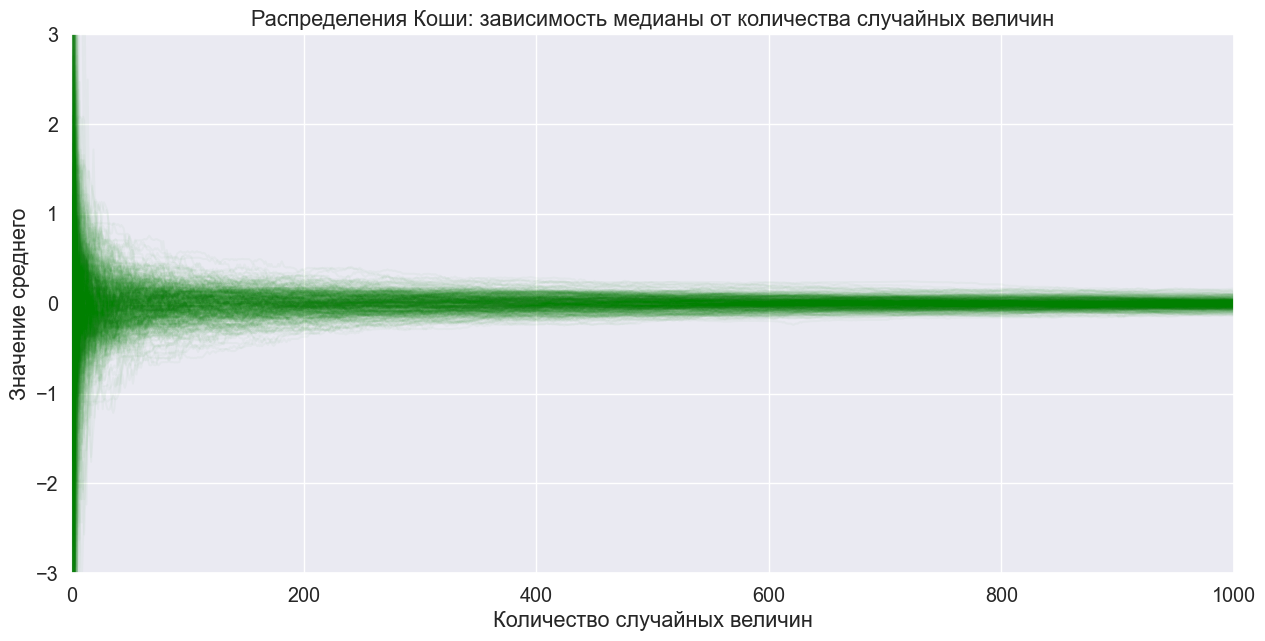

In [186]:
show_cummed_cauchy(cum_med, samples_count, -3, 3)

**Вывод:**

В этом задании мы исследовали работу закона больших чисел, или же посмотрели на разные средние для распределения Коши.

Так как у распределения Коши не существует мат ожидания, то говорить о законе больших чисел в сильной форме не корректно, но видно, что среднее значение концентрируется в нуле с ростом числа случайных величин.
Также на одиночных графиках можно видеть и на общем графике с малыми границами видно, что существует случайные величины, которые могут сильно отклонятся от 0, а после постепенно к нему возвращаться.

В отличие от среднего значения, эксперимент с медианой показал себя намного лучше, так как на всех графиках отчетливо видно, что с ростом числа случайных величин, значение медианы стремится к 0.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [288]:
# Размеры выборки
smp_cnt = 500
size = 1000  # Берем значение с запасом
mid = 0.5
want = 0.02

samples = sps.bernoulli(0.5).rvs(size=(smp_cnt, size))

 Теперь нужно реализовать функцию меры отклонения.

In [289]:
def loss_func(n):
    return np.mean(np.abs(np.mean(samples[:, :n], axis=1) - mid))

Теперь можно пройтись по значениям n, пока отклонение не достигнет нужного порога.

In [290]:
loss_vect = np.vectorize(loss_func)

np.min(np.nonzero(np.where(loss_vect(np.arange(size)) < want, 1, 0)))

387

Изобразим зависимость значения функции отклонения F от ее параметра n - числа значений в выборке.

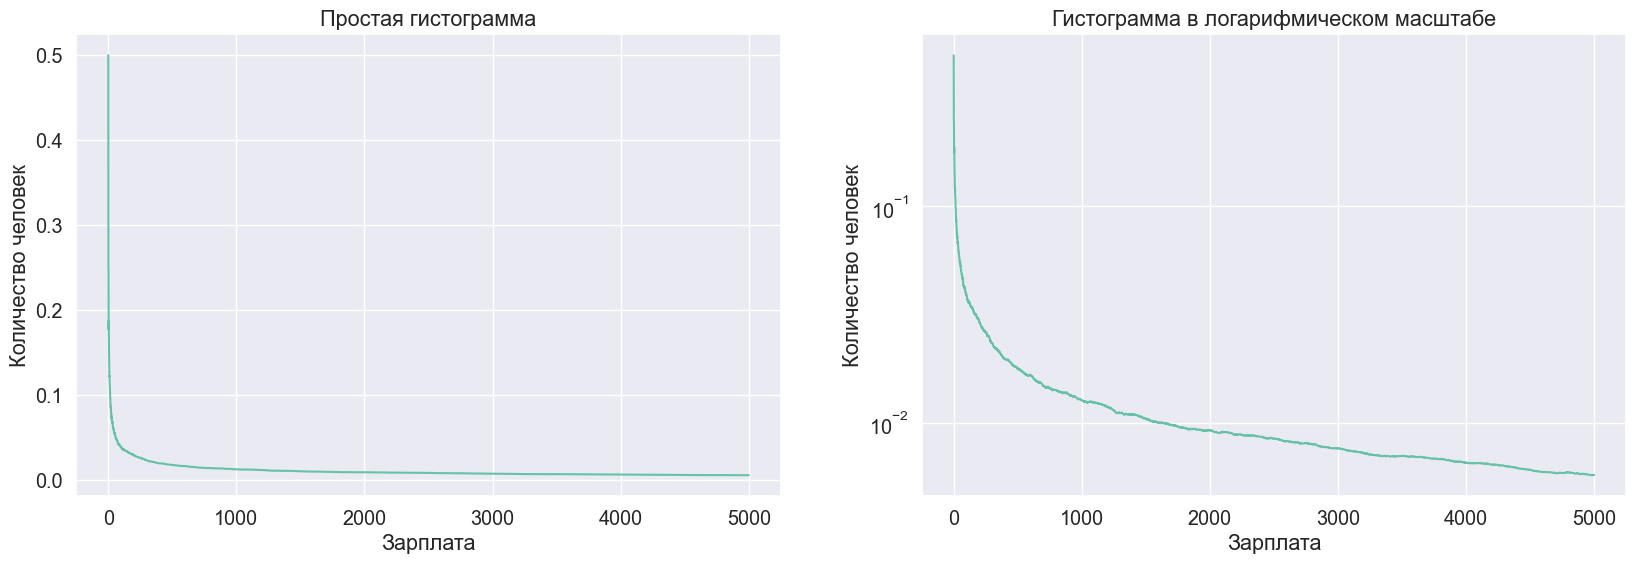

In [291]:
plt.figure(figsize=(20, 6))

loss = loss_vect(np.arange(size))

plt.subplot(121)
plt.plot(loss)
plt.xlabel("Зарплата")
plt.ylabel("Количество человек")
plt.title("Простая гистограмма")

plt.subplot(122)
plt.yscale("log")
plt.plot(loss)
plt.xlabel("Зарплата")
plt.ylabel("Количество человек")
plt.title("Гистограмма в логарифмическом масштабе")

plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [316]:
# Подготовим нужные вспомогательные параметры
want = 0.02  # Минимальное значение функции, которе бы мы хотели получить
loss_min = []  # массив для всех подходящих минимальных значений
smp_cnt = 500
size = 1000

Найдем для каждого значения параметра а минимальное значение для функции потери, так что она будет меньше 0.02.

In [317]:
for a in np.linspace(0.05, 0.95, 19):
    # а - мат ожидание и вероятность в распределении бернулли

    # генерация значений для фиксированного а
    samples = sps.bernoulli(a).rvs(size=(smp_cnt, size))

    # Устанавливаем среднее
    mid = a

    # Нахождение минимального n
    min = np.min(np.nonzero(np.where(loss_vect(np.arange(size)) < want, 1, 0)))
    loss_min.append(min)

Визуализируем полученные данные

Text(0.5, 1.0, 'Необходимое n, чтобы отклонение от среднего было < 0.02')

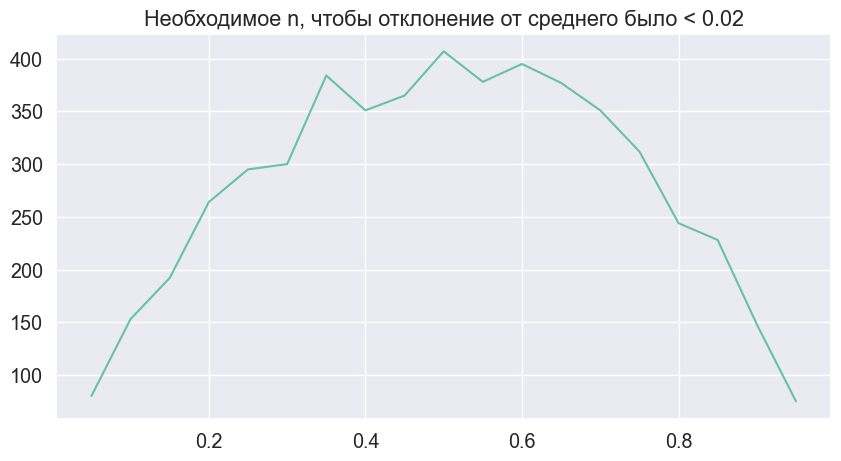

In [321]:
plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0.05, 0.95, 19), loss_min)
plt.title("Необходимое n, чтобы отклонение от среднего было < 0.02")

**Выводы:**

В этом задании мы исследовали, количество данных, которе необходимо, чтобы оценить среднее значение. 

Для распределения Бернулли, при росте количества данных - n, расстояние (по метрике F) до среднего уменьшалось. 

Также мы исследовали скорость уменьшения расстояния (по метрике F) от гиперпараметра p Бернуллевского распределения. При приближении гимерпараметра к 0 или 1, n становится меньше, соответственно скорость приближения к среднему возрастает, а в центре наоборот n - возрастает, а скорость уменьшается.